# SEMINAR IZ KVANTITATIVNIH METODA OBRADE PODATAKA

In [195]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats.distributions as dist  
import seaborn as sns
import matplotlib.pyplot as plt

Dataset je preuzet sa stranice : https://www.kaggle.com/johnsmith88/heart-disease-dataset

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "AHD" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

In [196]:
#priprema podataka

In [197]:
data = pd.read_csv('Heart.csv')
data.head(10)

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
5,6,56,1,nontypical,120,236,0,0,178,0,0.8,1,0.0,normal,No
6,7,62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2.0,normal,Yes
7,8,57,0,asymptomatic,120,354,0,0,163,1,0.6,1,0.0,normal,No
8,9,63,1,asymptomatic,130,254,0,2,147,0,1.4,2,1.0,reversable,Yes
9,10,53,1,asymptomatic,140,203,1,2,155,1,3.1,3,0.0,reversable,Yes


In [198]:
data.columns

Index([u'Unnamed: 0', u'Age', u'Sex', u'ChestPain', u'RestBP', u'Chol', u'Fbs',
       u'RestECG', u'MaxHR', u'ExAng', u'Oldpeak', u'Slope', u'Ca', u'Thal',
       u'AHD'],
      dtype='object')

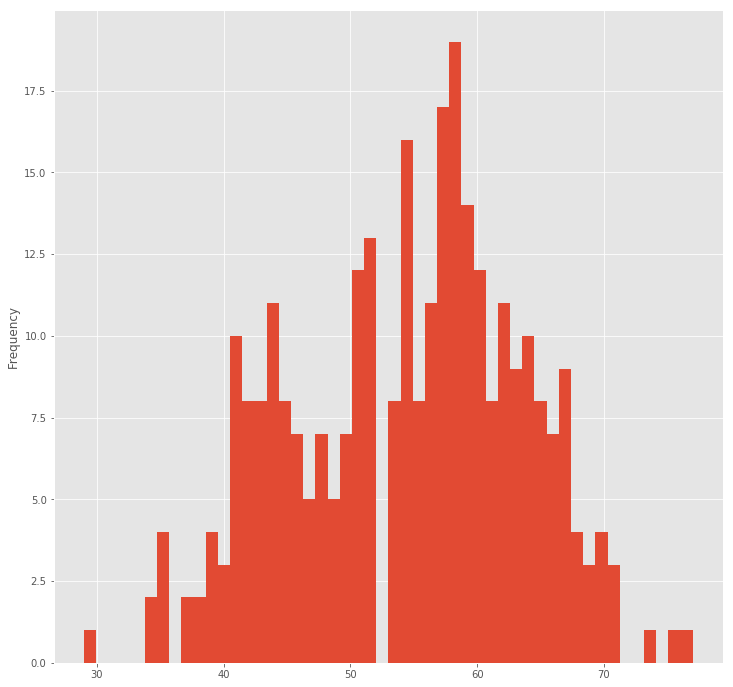

In [201]:
data.Age.plot(kind = 'hist', bins = 50, figsize = (12,12))
plt.show()

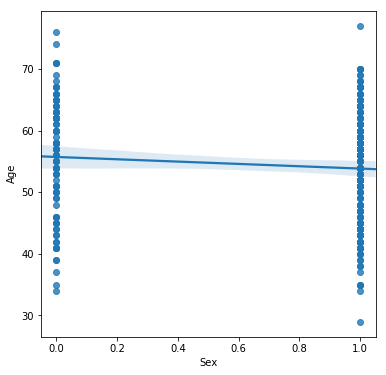

In [163]:

fig, ax=plt.subplots( figsize=(6,6))
sns.regplot(x="Sex", y="Age", data=data,)

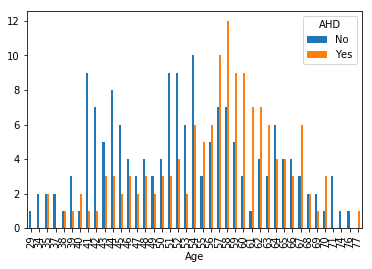

In [188]:
data=data.groupby(['Age','AHD']).size()
data=data.unstack()
data.plot(kind='bar')

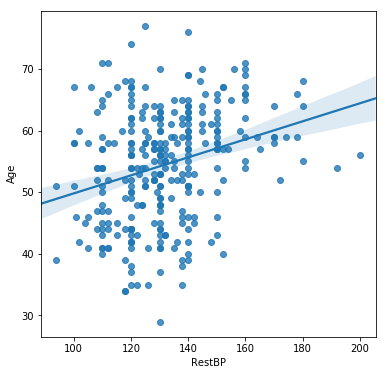

In [164]:
fig, ax=plt.subplots( figsize=(6,6))
sns.regplot(x="RestBP", y="Age", data=data,)

Text(0.5,1,'Age-Cholesterol Plot')

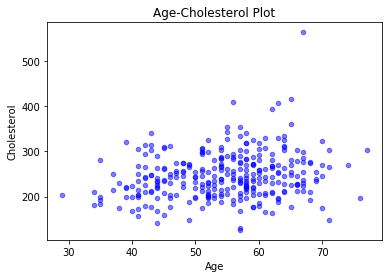

In [165]:
data.plot(kind = 'scatter',x = 'Age', y = 'Chol',alpha = 0.5, color = 'blue')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Age-Cholesterol Plot')

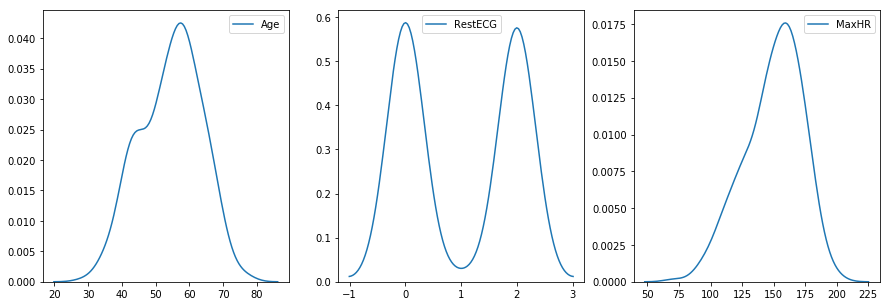

In [166]:
fig, ax=plt.subplots(1,3, figsize=(15,5))
sns.kdeplot(data['Age'], ax=ax[0])
sns.kdeplot(data['RestECG'], ax=ax[1])
sns.kdeplot(data['MaxHR'], ax=ax[2])

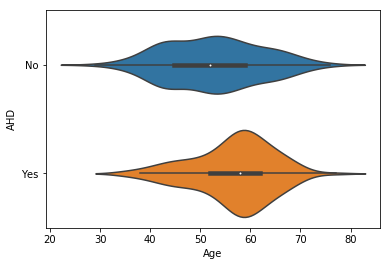

In [167]:
sns.violinplot(x=data['Age'], y=data['AHD'])

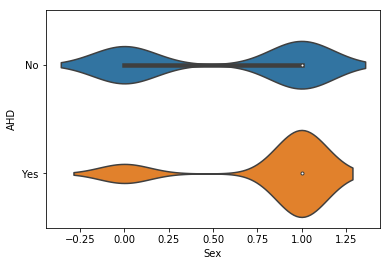

In [168]:
sns.violinplot(x=data['Sex'], y=data['AHD'])

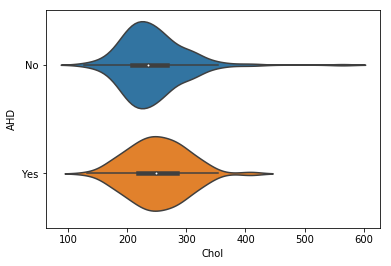

In [169]:
sns.violinplot(x=data['Chol'], y=data['AHD'])

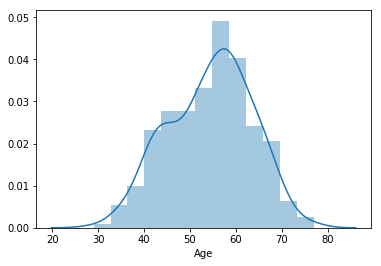

In [184]:
sns.distplot(data.Age)


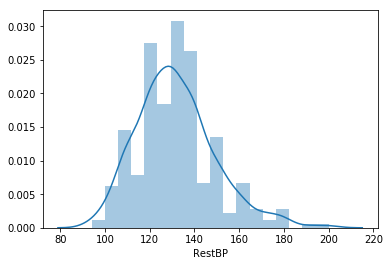

In [185]:
sns.distplot(data.RestBP)

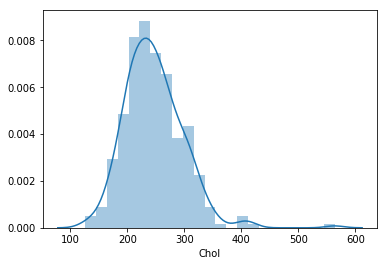

In [186]:
sns.distplot(data.Chol)

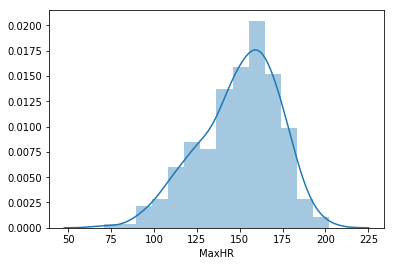

In [173]:
sns.distplot(data.MaxHR)



Možemo zaključiti da su podaci normalno distribuirani.

In [174]:
data.dtypes

Unnamed: 0      int64
Age             int64
Sex             int64
ChestPain      object
RestBP          int64
Chol            int64
Fbs             int64
RestECG         int64
MaxHR           int64
ExAng           int64
Oldpeak       float64
Slope           int64
Ca            float64
Thal           object
AHD            object
dtype: object

In [175]:
data.isnull()
#nema missing data

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


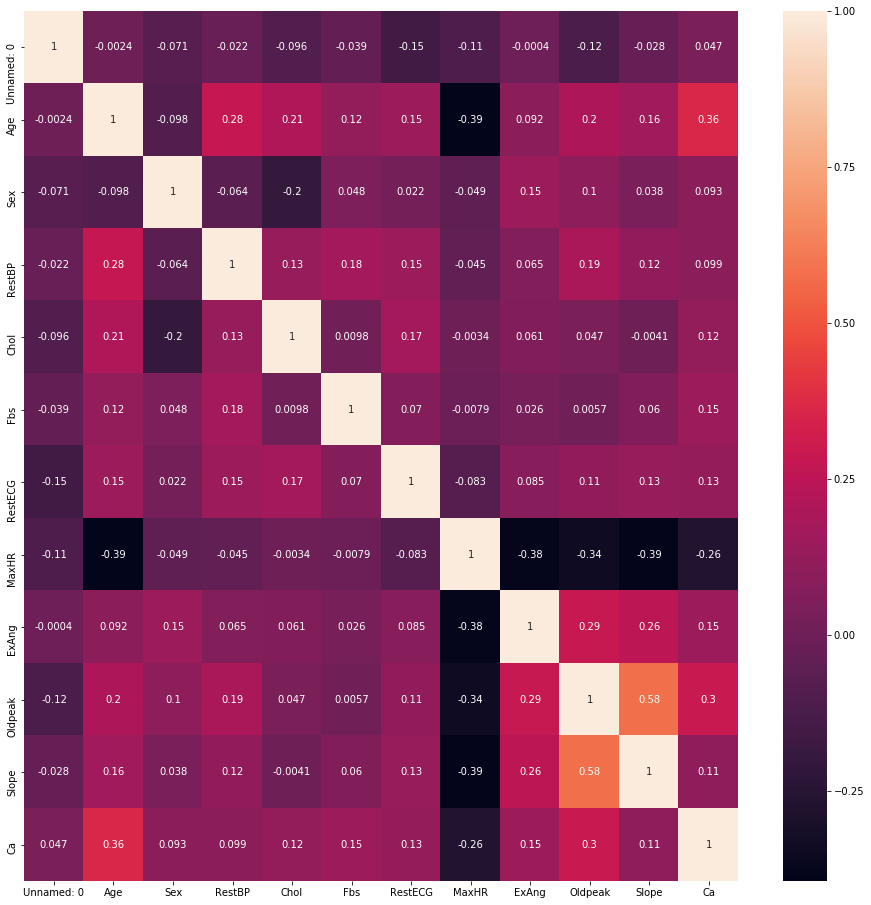

In [176]:
#heatmap
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 16))
sns.heatmap(data.corr(), annot=True,);


In [177]:
#testiranje hipoteza

# 1.hipoteza

Nearly half (48 percent, 121.5 million in 2016) of all adults in the United States have some type of cardiovascular disease, according to the American Heart Association's Heart and Stroke Statistics
https://www.sciencedaily.com/releases/2019/01/190131084238.htm#:~:text=Nearly%20half%20(48%20percent%2C%20121.5,in%20the%20Association's%20journal%20Circulation.

Istraživanja govore kako gotovo 48% odraslih u SAD-u obole od bolesti srca, međutim znanstvenici se više ne slažu s ovom tvrdnjom te smatraju kako je ta brojka mnogo veća.Možemo li zaključiti da je broj oboljenja od bolesti srca danas veći od 48% na nivou značajnosti od 5%?

In [178]:
#ukupan broj uzorka
n=len(data)
n

303

In [179]:

#pošto nemamo null vrijednosti, možemo izračunati koliko posto uzorka ima heart disease
len(data[data['AHD']=='Yes'])


139

In [180]:
#broj oboljelih

p_hat=float(139)/303


In [181]:
p=0.48
q=1-p
alpha=0.05

Z=(p_hat - p)/(np.sqrt(p*q))*np.sqrt(n)
Z


-0.740529327253349

In [182]:
from scipy.stats import norm
p_value=norm.cdf(Z)
p_value

0.22948943640407482

In [183]:
alpha=0.05
z_alpha=norm.ppf(1-alpha)
z_alpha

1.6448536269514722

Critical region:  [1.644,∞⟩

Statistical test: Z – test

Value of test statistic: -740529327253349

p – value: 0.229

Distribution: N(0,1)

ZAKLJUČAK:
Nismo uspjeli odbaciti hipotezu Ho na nivou značajnosti od 5% u korist alternativne hipoteze kako je p-value značajnije veći od nivoa značajnosti 5%. Ne možemo tvrditi da više od 0.48 % ljudi u Americi ima nekakvu bolest srca.

# 2.hipoteza 



#two sample test
Podaci pokazuju da žene i muškarci podjednako oboljevaju od srčanih bolesti. Istraživači se ne slažu s time te tvrde da postoje razlika.Možemo li dokazati da žene i muškarci ne obolijevaju jednako od bolesti srca na nivou značajnosti od 5%?

In [75]:
data['Sex'].value_counts()

1    206
0     97
Name: Sex, dtype: int64

In [76]:
data['Gender'] = data.Sex.replace({1: "Male", 0: "Female"})
p = data.groupby("Gender")['AHD'].agg([lambda z: np.mean(z=='Yes'), "size"])
p.columns = ["HeartDisease", 'Total']
p

,HeartDisease,Total
Gender,,
Female,0.257732,97
Male,0.553398,206


In [77]:

p_female = p.HeartDisease.Female
p_male = p.HeartDisease.Male

In [78]:
p_female, p_male

(0.25773195876288657, 0.5533980582524272)

In [79]:
p_ukupno=float(139)/303
p_ukupno

0.45874587458745875

In [80]:
n1 = p.Total.Female
n2 = p.Total.Male
n1,n2

(97, 206)

In [81]:
from __future__ import division

In [92]:
#standard error za skučaj kad imamo dvije populacije
SE = np.sqrt(p_ukupno*(1-p_ukupno)/(1/n1+1/n2))


In [93]:
SE

4.046549512897573

In [94]:
estimate=p_female - p_male
estimate

-0.2956660994895406

In [95]:
mu_0 = 0

In [86]:
#mu_0 = p_female - p_male  


test_statistic = (estimate - mu_0)/SE

In [87]:
test_statistic

-0.07306622556999824

In [88]:
pvalue = 2*dist.norm.cdf(-np.abs(test_statistic))

In [89]:
pvalue

0.9417534178855081

In [97]:
alpha=0.05
z_alpha_half=norm.ppf(1-(alpha/2))
z_alpha_half

1.959963984540054

Critical region: $\left\langle-\infty, -1.959\right] \cup \left[1.959, \infty \right\rangle$

Statistical test: Z – test

Value of test statistic: -0.07306622556999824

p – value: 0.9417534178855081

Distribution: N(0,1)

ZAKLJUČAK:
P value je značajnije veći od nivoa značajnosti od 5 %, što znači da nemamo dovoljno dokaza da odbacimo H0 hipotezu da nema razlike između oboljevanja žena i muškaraca u korist alternativne hipoteze.

# 3.hipoteza

Hypotheses: $H_0:$ $\mu =63 $ , $H_1: \mu > 63$

Prema istraživanjima provedenim na globalnoj razini prosječna dob obolijevanja od bolesti srca je 63 godine. Stručnjaci se ne slažu s tom tvrdnjom te smatraju da ljudi oboljevaju od bolesti srca kasnije.Možemo li zaključiti da je ova tvrdnja točna na nivou značajnosti od 5%?

In [101]:
new_data=data.loc[(data['Age']) & (data['AHD'] == 'Yes')]
new_data
#svi ispitanici koji imaju srčana oboljenja

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,Gender
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes,Male
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes,Male
8,9,63,1,asymptomatic,130,254,0,2,147,0,1.4,2,1.0,reversable,Yes,Male
9,10,53,1,asymptomatic,140,203,1,2,155,1,3.1,3,0.0,reversable,Yes,Male
36,37,43,1,asymptomatic,120,177,0,2,120,1,2.5,2,0.0,reversable,Yes,Male
37,38,57,1,asymptomatic,150,276,0,2,112,1,0.6,2,1.0,fixed,Yes,Male
38,39,55,1,asymptomatic,132,353,0,0,132,1,1.2,2,1.0,reversable,Yes,Male
40,41,65,0,asymptomatic,150,225,0,2,114,0,1.0,2,3.0,reversable,Yes,Female
44,45,61,0,asymptomatic,130,330,0,2,169,0,0.0,1,0.0,normal,Yes,Female
57,58,41,1,asymptomatic,110,172,0,2,158,0,0.0,1,0.0,reversable,Yes,Male


In [104]:
n=len(new_data['Age'])
mu_0=63
std=np.std(new_data['Age'],ddof=1)
sample_mean=np.mean(new_data['Age'])

In [105]:
n, std, sample_mean

(67, 8.415810753977668, 56.850746268656714)

In [110]:
t_value=(sample_mean - mu_0)/std*np.sqrt(n)

In [111]:
t_value

-5.980862990652194

In [112]:
from scipy.stats import t
pv = 2 * (1 - t.cdf(abs(t_value), n - 1))
pv

9.9970401068461e-08

In [113]:
alpha = 0.05

t_alpha = t.ppf(1 - alpha, n - 1)
t_alpha

1.6682705140701908

Critical region: $\left[1.668, \infty \right\rangle$

Statistical test: one sample t – test

Value of test statistic: -5.980862990652194

p – value:9.9970401068461e-08

Distribution of test statistic:(under H0):t(66)

Zaključak:P-value je manji od nivoa značajnosti te možemo odbaciti null hipotezu u korist alternativne na nivou značajnosti od 5%.Prema tome možemo zaključiti da je prosječna godina oboljevanja od bolesti srca viša od 63 godine.

# 4.Hipoteza

Hypotheses: $H_0:$ $\mu = 135$ , $H_1: \mu > 135$

Dostupni podaci tvrde da je prosječni RestBP(resting blood pressure) manji ili jednak 135. Neki liječnici tvrde da tome nije tako, već da je prosječan RestBP viši. Zabilježili su RestBP na uzorku od 303 nasumično odabranih ljudi.
Možemo li odbaciti nultu hipotezu na nivou značajnosti od 5%?

In [117]:
mu_0=135
sample_mean=np.mean(data['RestBP'])
std=np.std(data['RestBP'],ddof=1)
n=len(data['RestBP'])

In [118]:
sample_mean, std, n

(131.68976897689768, 17.599747729587687, 303)

In [119]:
t_value=(sample_mean - mu_0)/std*np.sqrt(n)

In [120]:
t_value

-3.273958544426198

In [121]:
from scipy.stats import t
p_value=2 *(1 - t.cdf(abs(t_value),n-1))

In [122]:
p_value

0.00118371271883011

In [123]:
alpha = 0.05

t_alpha = t.ppf(1 - alpha, n - 1)
t_alpha

1.6499148276145903

Critical region:  [1.65,∞⟩

Statistical test: one sample t – test

Value of test statistic: -3.273958544426198

Distribution of test statistic:(under H0):t(302)

p – value: 0.001


Zaključak:Pošto je p - value manji od sprecifičnog nivoa značajnosti,možemo odbaciti null hipotezu u korist alternativne na nivou značajnosti od 5%.Prema tome možemo zaključiti da je prosječan RestBP veći od 135.
